In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
df = pd.read_excel('raw_hardship_homs.xlsx')
df.head(5)

,Community,index,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14,HI17,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17,HOM14,HOM17
0,Rogers Park,0,39.7,9.3,16.4,27.2,7.1,24.0,24323,39.4,7.7,9.5,26.2,6.6,22.6,25874,8,4
1,West Ridge,1,44.3,10.0,17.1,38.3,7.6,17.4,23498,47.3,8.6,11.7,37.9,7.7,16.8,24721,3,2
2,Uptown,2,29.9,10.1,10.8,23.3,3.8,23.9,37180,31.5,6.6,7.8,24.3,4.7,21.3,37869,5,5
3,Lincoln Square,3,23.8,7.9,10.6,26.0,1.6,12.7,39524,21.7,4.2,6.0,25.8,1.7,10.8,44432,0,1
4,North Center,4,14.9,4.6,6.0,27.8,0.6,6.1,56893,16.9,3.6,4.4,32.2,0.7,5.2,64494,0,0


In [2]:
str14 = 'UNEMP14'
str17 = 'UNEMP17'

 Under standardization, relative deprivation occurs when  the relative change in disparity between community $\mathcal{C}$'s specified indicator value and the mean indicator value ($\frac{dA}{A}$) is greater than the relative change in standard deviation of that indicator's value ($\frac{ds}{s}$) (understandably so, since standard deviation gives average disparity between indicator and mean values):

\begin{equation}
    \frac{dA}{A}> \frac{ds}{s}. \label{rd4}
\end{equation}

In [3]:
a14 = df[str14].mean()
s14 = df[str14].std()

a17 = df[str17].mean()
s17 = df[str17].std()

da = a17-a14
ds = s17-s14

In [4]:
ds/s14

-0.053971554913129986

In [5]:
def plotPoints(plt, x, r, depFlag, comFlag):
    if comFlag and depFlag:
        plt.scatter(x, r, s = 100, color="k", alpha=0.6, marker='^', edgecolors='r')
        
    elif comFlag:
        plt.scatter(x, r, s = 100, color="lightblue", alpha=0.8, marker='^', edgecolors='r')
    
    elif depFlag:
        plt.scatter(x, r, color="k", alpha=0.6)
        
    else:
        plt.scatter(x, r, color='lightblue', alpha=0.8)

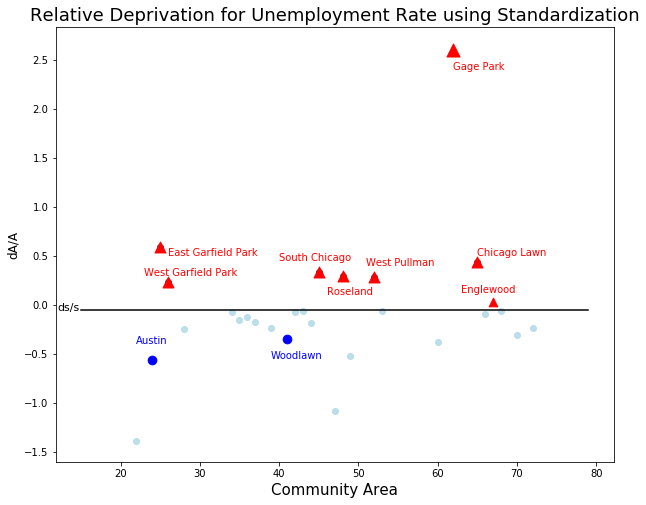

In [6]:
fig=plt.figure(figsize=(10,8))
for i in df.index:
    if i == 46 or i == 29:
        continue
        
    x14 = df.loc[i,str14]
    x17 = df.loc[i,str17]
    A2 = x14 - a14
    dx = x17 - x14
    dA2 = dx - da
    r = dA2/A2
    
#     depFlag = (x14 > a14 and r > (ds/s14) and dx < 0) or (x14 < a14 and r < (ds/s14) and dx < 0)
    comFlag = (df.loc[i,'Community'] == 'Woodlawn') or (df.loc[i,'Community'] == 'Austin') or (df.loc[i,'Community'] == 'Englewood')or (df.loc[i,'Community'] == 'Gage Park')
#     plotPoints(plt, df.loc[i,'index'], r, depFlag, comFlag)
    
    if x14 > a14 and dx < 0:
        if not comFlag:
            plt.scatter(df.loc[i,'index'],r,color='lightblue', alpha=0.8)   
            if r > (ds/s14):
                plt.scatter(df.loc[i,'index'],r, color="k", alpha=0.6)
    
        if df.loc[i,'Community'] == 'Woodlawn':
            plt.scatter(df.loc[i,'index'],r, color="b", s=75, alpha=1, marker='o', edgecolors='b')
            plt.text(39,-0.55, 'Woodlawn', color='b')
    
        elif df.loc[i,'Community'] == 'Austin':
            plt.scatter(df.loc[i,'index'],r, color="b", s=75, alpha=1, marker='o', edgecolors='b')
            plt.text(22,-.4, 'Austin', color='b')
        
        elif df.loc[i,'Community'] == 'Englewood':
            plt.scatter(df.loc[i,'index'],r, color="r", s=75, alpha=1, marker='^', edgecolors='r')
            plt.text(63,0.125, 'Englewood', color='r')
            
        elif df.loc[i,'Community'] == 'Gage Park':
            plt.scatter(df.loc[i,'index'],r, color="r", s=170, alpha=1, marker='^', edgecolors='r')
            plt.text(62,2.4, 'Gage Park', color='r')
            
        elif df.loc[i,'Community'] == 'West Garfield Park':
            plt.scatter(df.loc[i,'index'],r, color="r", s=120, alpha=1, marker='^', edgecolors='r')
            plt.text(23,.3, 'West Garfield Park', color='r')
            
        elif df.loc[i,'Community'] == 'Chicago Lawn':
            plt.scatter(df.loc[i,'index'],r, color="r", s=120, alpha=1, marker='^', edgecolors='r')
            plt.text(65,.5, 'Chicago Lawn', color='r')
            
        elif df.loc[i,'Community'] == 'West Pullman':
            plt.scatter(df.loc[i,'index'],r, color="r", s=120, alpha=1, marker='^', edgecolors='r')
            plt.text(51,.4, 'West Pullman', color='r')
            
        elif df.loc[i,'Community'] == 'Roseland':
            plt.scatter(df.loc[i,'index'],r, color="r", s=120, alpha=1, marker='^', edgecolors='r')
            plt.text(46,.1, 'Roseland', color='r')
            
        elif df.loc[i,'Community'] == 'South Chicago':
            plt.scatter(df.loc[i,'index'],r, color="r", s=120, alpha=1, marker='^', edgecolors='r')
            plt.text(40,.45, 'South Chicago', color='r')
            
        elif df.loc[i,'Community'] == 'East Garfield Park':
            plt.scatter(df.loc[i,'index'],r, color="r", s=120, alpha=1, marker='^', edgecolors='r')
            plt.text(26,.5, 'East Garfield Park', color='r')
            
        elif df.loc[i,'Community'] == 'West Elsden':
            plt.scatter(df.loc[i,'index'],r, color="r", s=120, alpha=1, marker='^', edgecolors='r')
            plt.text(18,.5, 'West Elsden', color='r')

plt.xlabel('Community Area', fontsize=15)
plt.ylabel('dA/A', fontsize=12)
plt.text(12,-.065, 'ds/s', color='k',fontsize=11 )

plt.title('Relative Deprivation for Unemployment Rate using Standardization', fontsize=18)
x = np.arange(15,80, 1)
y = x*0 - 0.05
plt.plot(x,y,'k')
plt.savefig("rel_dep.png")
plt.show()

 Under normalization of the raw indicators, assuming community $\mathcal{C}$ has a reduced hardship in a specified raw indicator, relative deprivation occurs when the relative change in disparity between   community $\mathcal{C}'s$ raw indicator and the least hardship community's raw indicator exceeds the relative change in disparity between the greatest and least hardship communities' raw indicators:  

\begin{equation}
    \frac{dA_1}{A_1} > \frac{d D}{D}. \label{rd2}
\end{equation}

In [7]:
M14 = df[str14].max()
m14 = df[str14].min()

M17 = df[str17].max()
m17 = df[str17].min()

dM = M17 - M14
dm = m17 - m14

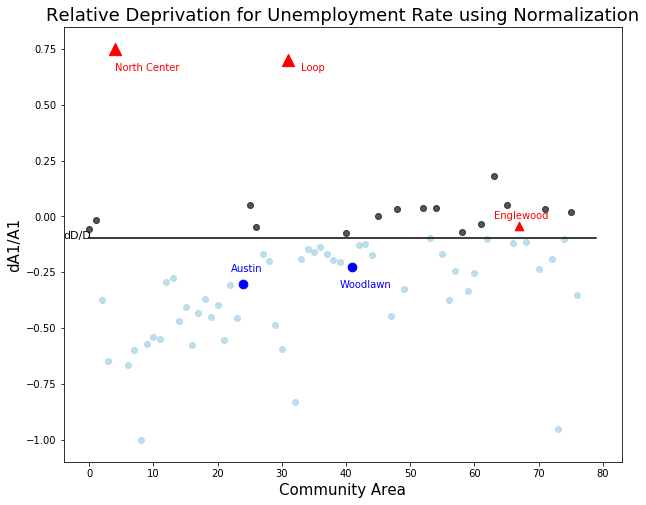

In [8]:
fig=plt.figure(figsize=(10,8))
for i in df.index:
    x14 = df.loc[i,str14]
    x17 = df.loc[i,str17]
    dx = x17 - x14
    A1 = x14 - m14
    D = M14 - m14
    dA1 = dx - dm
    dD = dM - dm

    if A1 == 0:
        continue
        
    comFlag = (df.loc[i,'Community'] == 'Woodlawn') or (df.loc[i,'Community'] == 'Woodlawn') or (df.loc[i,'Community'] == 'Austin') or (df.loc[i,'Community'] == 'Englewood') or (df.loc[i,'Community'] == 'North Center') or (df.loc[i,'Community'] == 'Loop')
        
    r = dA1/A1
    
    if dx < 0:
        if not comFlag:
            plt.scatter(df.loc[i,'index'],r,color='lightblue', alpha=0.8)
            if r > (dD/D):
                plt.scatter(df.loc[i,'index'],r, color="k", alpha=0.6)
    
        elif df.loc[i,'Community'] == 'Woodlawn':
            plt.scatter(df.loc[i,'index'],r, color="b", s=75, alpha=1, marker='o', edgecolors='b')
            plt.text(39,-0.32, 'Woodlawn', color='b')

        elif df.loc[i,'Community'] == 'Austin':
            plt.scatter(df.loc[i,'index'],r, color="b", s=75, alpha=1, marker='o', edgecolors='b')
            plt.text(22,-0.25, 'Austin', color='b')

        elif df.loc[i,'Community'] == 'Englewood':
            plt.scatter(df.loc[i,'index'],r, color="r", s=75, alpha=1, marker='^', edgecolors='r')
            plt.text(63,-0.01, 'Englewood', color='r')
            
        elif df.loc[i,'Community'] == 'North Center':
            plt.scatter(df.loc[i,'index'],r, color="r", s=150, alpha=1, marker='^', edgecolors='r')
            plt.text(4,.65, 'North Center', color='r')
            
        elif df.loc[i,'Community'] == 'Loop':
            plt.scatter(df.loc[i,'index'],r, color="r", s=150, alpha=1, marker='^', edgecolors='r')
            plt.text(33,.65, 'Loop', color='r')

plt.xlabel('Community Area', fontsize=15)
plt.ylabel('dA1/A1', fontsize=15)
plt.text(-4,-.1, 'dD/D', color='k',fontsize=11 )
plt.title('Relative Deprivation for Unemployment Rate using Normalization', fontsize=18)
x = np.arange(0,80, 1)
y = x*0 - 0.098
plt.plot(x,y,'k')
plt.show()